# INTRODUCTION

garment industry
<!-- In Bangladesh, the garment industry has played an important role in economically uplifting a diverse community of poor and marginalized people. There are now 4,825 garment factories that employ more than three million people. Completely 85% of these employees are female. But most of the female workers work to support their family and also contribute his family to lead a minimum life. In this paper, we try to find out relation between their health status, their family earning, their family member information, their working time or how many year they work in this sector and how many time they want to work. The dataset is collected from the Ashulia and Gazipur area garments of Bangladesh. This research work has observed that most of the female workers work at finishing, swing, helper, and cleaner sector. In this sector they cannot get huge salary that's why their income is limited and the range of their salaries is very low. It has also been found that, some women manage their whole family with their own income. Besides they are feeling bored with the same work. Nowadays machine learning and data mining tools play a vital role in finding the measurement of some important factors. This paper analyses the women working performance based on their previous activity and use some machine learning algorithms likely: Decision Tree Classifier(DTC), Logistic Regression(LR), Random Forest Classifier(RFC), and Stochastic Gradient Descent(SGD) we get the best result from Logistic Regression(LR) and it is 69%. -->

# BUSINESS PROBLEM

GOAL; in plain term. NOTEtoSELF: EDIT THIS
- Predict bad performance of workers. 
    - Focus on predicting bad performance, don't want to miss much of those. 
    - Focus on maximizing true negatives and minimizing false positives while tackling overfitting.
- to achieve a met goal how many people should be assigned at every department and does overtime has any relation with achieving target.

# IMPORTS

In [1]:
# core operational packeges
import os
import warnings

# dataset manupulation
import pandas as pd
pd.set_option('display.max_columns', 0)
import numpy as np
from IPython.display import display, HTML, Markdown

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import plotly.graph_objs as go
# import plotly.express as px

In [2]:
# Machine Learning
# preprocessing
from sklearn import set_config
from sklearn.model_selection import train_test_split#, cross_val_predict, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
# from imblearn.over_sampling import SMOTE,SMOTENC


# model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier, XGBRFClassifier
import xgboost as xgb

from catboost import CatBoostClassifier

In [3]:
# Model Explainers
# from yellowbrick.classifier.rocauc import roc_auc, precision_recall_curve, confusion_matrix, classification_report, ClassPredictionError

import shap
import lime
import interpret
import eli5

from time import sleep
# sleep(1)
# !pip show shap
# print(f'{"-"*80}')
# sleep(1)
# !pip show lime
# sleep(1)
# print(f'{"-"*80}')
# !pip show interpret
# sleep(1)
# print(f'{"-"*80}')
# !pip show eli5

In [4]:
# custom functions and packages loader
%load_ext autoreload
%autoreload 2
import functions as fun
from packages import *

# notebook styling packages
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')
## to reset to default theme
# jtplot.reset()

# OBTAIN

The data is obtained from UCI Machine Learning Repository, titled "Productivity Prediction of Garment Employees Data Set" by [Abdullah Al Imran](abdalimran@gmail.com)[1]. Which can be found [here](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#). A copy of the data is in this repository at `/data/garments_worker_productivity.csv`.

<br>
Data with explanation.

 - `date`: Date in MM-DD-YYYY.
 - `day`: Day of the Week.
 - `quarter`: A portion of the month. A month was divided into four quarters.
 - `department`: Associated department with the instance.
 - `team_no`: Associated team number with the instance.
 - `no_of_workers`: Number of workers in each team.
 - `no_of_style_change`: Number of changes in the style of a particular product.
 - `targeted_productivity`: Targeted productivity set by the Authority for each team for each day.
 - `smv`: Standard Minute Value, it is the allocated time for a task.
 - `wip`: Work in progress. Includes the number of unfinished items for products.
 - `over_time`: Represents the amount of overtime by each team in minutes.
 - `incentive`: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
 - `idle_time`: The amount of time when the production was interrupted due to several reasons.
 - `idle_men`: The number of workers who were idle due to production interruption.
 - `actual_productivity`: The actual % of productivity that was delivered by the workers. It ranges from 0-1.


<br>

[1]  ```Rahim, M. S., Imran, A. A., & Ahmed, T. (2021). Mining the Productivity Data of Garment Industry. International Journal of Business Intelligence and Data Mining, 1(1), 1. ```



<!--  Rahim, Md Shamsur, Abdullah Al Imran, and Tanvir Ahmed. “Mining the Productivity Data of Garment Industry.” International Journal of Business Intelligence and Data Mining 1, no. 1 (2021): 1. https://doi.org/10.1504/ijbidm.2021.10028084.  -->
 

<br>
<p class="normal">@article{Rahim_2021,
<br>	doi = {10.1504/ijbidm.2021.10028084},
<br>	url = {<a href="https://doi.org/10.1504%2Fijbidm.2021.10028084">[Web Link]</a>},
<br>	year = 2021,
<br>	publisher = {Inderscience Publishers},
<br>	volume = {1},
<br>	number = {1},
<br>	pages = {1},
<br>	author = {Md Shamsur Rahim and Abdullah Al Imran and Tanvir Ahmed},
<br>	title = {Mining the Productivity Data of Garment Industry},
<br>	journal = {International Journal of Business Intelligence and Data Mining}
<br>}
</p>

# SCRUB & EXPLORE

## data

In [5]:
# loading data
df = pd.read_csv('./data/garments_worker_productivity.csv')

In [6]:
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
751,2/14/2015,Quarter2,finishing,Saturday,4,0.75,4.15,NaN,2400,0,0.0,0,0,20.0,0.902917
570,2/2/2015,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
47,1/4/2015,Quarter1,sweing,Sunday,8,0.80,25.90,1039.0,6780,45,0.0,0,0,56.5,0.850345
462,1/27/2015,Quarter4,finishing,Tuesday,3,0.75,3.94,NaN,1440,0,0.0,0,0,12.0,0.861875
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1114,3/8/2015,Quarter2,sweing,Sunday,1,0.75,26.82,1254.0,6960,65,0.0,0,0,58.0,0.850071
571,2/2/2015,Quarter1,finishing,Monday,12,0.75,4.08,NaN,1080,0,0.0,0,0,9.0,0.740444
325,1/19/2015,Quarter3,sweing,Monday,2,0.70,22.94,1006.0,10170,38,0.0,0,0,56.5,0.750518
51,1/4/2015,Quarter1,sweing,Sunday,12,0.80,11.61,1216.0,6975,50,0.0,0,0,31.0,0.800030
174,1/11/2015,Quarter2,finishing,Sunday,9,0.80,3.94,NaN,1440,0,0.0,0,0,8.0,0.858144


 <br>
<!-- # #CHEATCODE##
# import dtale
# from pandas_profiling import ProfileReport
# dtale.show(df) -->

<br>
<!-- # profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_widgets() -->

In [7]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [8]:
fun.check_NaN(df)

,name,is_null,not_null
0,date,0,1197
1,quarter,0,1197
2,department,0,1197
3,day,0,1197
4,team,0,1197
5,targeted_productivity,0,1197
6,smv,0,1197
7,wip,506,691
8,over_time,0,1197
9,incentive,0,1197


In [9]:
fun.check_duplicates(df, verbose=True)

date >> number of uniques: 59
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
____________________________________________________________
quarter >> number of uniques: 5
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
____________________________________________________________
department >> number of uniques: 3
['sweing' 'finishing ' 'fini

,name,duplicated,not_duplicated
0,date,1138,59
1,quarter,1192,5
2,department,1194,3
3,day,1191,6
4,team,1185,12
5,targeted_productivity,1188,9
6,smv,1127,70
7,wip,648,549
8,over_time,1054,143
9,incentive,1149,48


In [10]:
df.describe().transpose().round(2).style.format("{0:,.2f}")

,count,mean,std,min,25%,50%,75%,max
team,"1,197.00",6.43,3.46,1.00,3.00,6.00,9.00,12.00
targeted_productivity,"1,197.00",0.73,0.10,0.07,0.70,0.75,0.80,0.80
smv,"1,197.00",15.06,10.94,2.90,3.94,15.26,24.26,54.56
wip,691.00,"1,190.47","1,837.46",7.00,774.50,"1,039.00","1,252.50","23,122.00"
over_time,"1,197.00","4,567.46","3,348.82",0.00,"1,440.00","3,960.00","6,960.00","25,920.00"
incentive,"1,197.00",38.21,160.18,0.00,0.00,0.00,50.00,"3,600.00"
idle_time,"1,197.00",0.73,12.71,0.00,0.00,0.00,0.00,300.00
idle_men,"1,197.00",0.37,3.27,0.00,0.00,0.00,0.00,45.00
no_of_style_change,"1,197.00",0.15,0.43,0.00,0.00,0.00,0.00,2.00
no_of_workers,"1,197.00",34.61,22.20,2.00,9.00,34.00,57.00,89.00


In [11]:
# fun.distribution_of_features(df,color_plot='silver')

## Feature engineering

### Creating target; `performance`

In [12]:
# # Multiclass target, labaled
# # empty list to hold data
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append('below')
#     elif 0 <= delta < .25:
#         lst.append('met')
#     elif delta >= .25:
#         lst.append('above')
#     # error hadeler
#     else:
#         lst.append('?')
# df['performance'] = lst

In [13]:
# # binary target class, labaled
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append('not_met')
#     else:
#         lst.append('met')
# df['performance'] = lst

In [14]:
# binary target class, int
lst = []
for x in zip(df.targeted_productivity, df.actual_productivity):
    # % change in variables
    delta = np.log(x[1] / x[0])
    if delta < 0:
        lst.append(0)
    else:
        lst.append(1)
df['performance'] = lst

In [15]:
# # Multiclass target, int
# # empty list to hold data
# lst = []
# for x in zip(df.targeted_productivity, df.actual_productivity):
#     # % change in variables
#     delta = np.log(x[1] / x[0])
#     if delta < 0:
#         lst.append(0)
#     elif 0 <= delta < .25:
#         lst.append(1)
#     elif delta >= .25:
#         lst.append(2)
#     # error hadeler
#     else:
#         lst.append('?')
# df['performance'] = lst

In [16]:
df.performance.value_counts()

1    875
0    322
Name: performance, dtype: int64

### cleaning `wip`

In [17]:
# filling NaN's with 0, meaning no wip for that session
df['wip'] = df['wip'].fillna(0)

In [18]:
# # filling NaN's with 0, meaning no wip for that session
# df['wip'] = df['wip'].fillna(0)
# # intervals for binning
# bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 150), 
#                                      (150, 500), (500, 2500),
#                                      (2500, 1e6)],
#                                     closed='left')
# # binning
# wip_size = pd.cut(df['wip'].tolist(), bins=bins)
# # naming categories
# wip_size.categories = ['no_wip', 'small', 'med', 'large', 'xl']
# # appending to df
# df['wip_size'] = wip_size

### text cleaning in `department` categories 

In [19]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [20]:
# cleaning spaces
df['department'] = df['department'].str.strip()
# checking
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

### cleaning `targeted_productivity`

In [21]:
# correcting possible error in data
df[df.targeted_productivity<.3]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,performance
633,2/5/2015,Quarter1,sweing,Thursday,7,0.07,24.26,1608.0,6960,0,0.0,0,0,58.0,0.522845,1


In [22]:
print(
f"""
mode: {df.targeted_productivity.mode()[0]},
mean: {round(df.targeted_productivity.mean(),2)},
25% quantile: {df.targeted_productivity.quantile(.25)}"""
)


mode: 0.8,
mean: 0.73,
25% quantile: 0.7


In [23]:
df.at[df[df.targeted_productivity < .3].index,
      'targeted_productivity'] = df.targeted_productivity.quantile(.25)

df[df.targeted_productivity < .3]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,performance


### drop features

In [24]:
df.drop(columns=['date', 'actual_productivity'], inplace=True)

In [25]:
# df.drop(columns=['date', 'wip', 'actual_productivity'], inplace=True)

### dtype casting

In [26]:
df.dtypes

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
performance                int64
dtype: object

In [27]:
df['quarter'] = df['quarter'].astype('category')
df['department'] = df['department'].astype('category')
df['day'] = df['day'].astype('category')
# df['team'] = df['team'].astype('category')
# df['performance'] = df['performance'].astype('category')

In [28]:
df.dtypes

quarter                  category
department               category
day                      category
team                        int64
targeted_productivity     float64
smv                       float64
wip                       float64
over_time                   int64
incentive                   int64
idle_time                 float64
idle_men                    int64
no_of_style_change          int64
no_of_workers             float64
performance                 int64
dtype: object

### preparing data for model

In [29]:
print(f"""numeric cols: {df.select_dtypes('number').columns.tolist()}
categorical cols {df.select_dtypes('category').columns.tolist()}""")

numeric cols: ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'performance']
categorical cols ['quarter', 'department', 'day']


#### split using `sklearn`

In [30]:
X = df.drop(columns='performance').copy()
y = df['performance'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 13), (897,), (300, 13), (300,))

#### OHE using `pandas`

In [32]:
pd.get_dummies(X_train).shape, pd.get_dummies(X_test).shape

((897, 23), (300, 23))

#### Pipelining

In [33]:
_test_pipe_train, _test_pipe_test = fun.dataset_preprocessing_pipeline(
    X_train, X_test, scaler=fun.RobustScaler(), drop='first')
display(_test_pipe_train.describe().T.round(2),
        _test_pipe_test.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
team,897.0,-0.09,0.58,-1.00,-0.67,0.0,0.33,0.83
targeted_productivity,897.0,-0.22,0.96,-4.00,-0.50,0.0,0.50,0.50
smv,897.0,-0.01,0.56,-0.63,-0.57,0.0,0.43,1.99
wip,897.0,0.06,1.36,-0.58,-0.58,0.0,0.42,20.75
over_time,897.0,0.11,0.62,-0.73,-0.46,0.0,0.54,4.02
incentive,897.0,0.82,3.63,0.00,0.00,0.0,1.00,72.00
idle_time,897.0,0.86,14.37,0.00,0.00,0.0,0.00,300.00
idle_men,897.0,0.41,3.59,0.00,0.00,0.0,0.00,45.00
no_of_style_change,897.0,0.15,0.43,0.00,0.00,0.0,0.00,2.00
no_of_workers,897.0,0.01,0.46,-0.67,-0.52,0.0,0.48,1.15


,count,mean,std,min,25%,50%,75%,max
team,300.0,-0.12,0.58,-1.00,-0.67,-0.17,0.33,0.83
targeted_productivity,300.0,-0.15,0.95,-4.00,-0.50,0.00,0.50,0.50
smv,300.0,-0.01,0.54,-0.63,-0.57,0.00,0.46,1.80
wip,300.0,0.06,1.50,-0.58,-0.58,-0.08,0.42,19.15
over_time,300.0,0.12,0.58,-0.73,-0.46,0.02,0.55,2.02
incentive,300.0,0.60,1.25,0.00,0.00,0.00,1.00,19.20
idle_time,300.0,0.34,5.21,0.00,0.00,0.00,0.00,90.00
idle_men,300.0,0.25,2.05,0.00,0.00,0.00,0.00,25.00
no_of_style_change,300.0,0.14,0.41,0.00,0.00,0.00,0.00,2.00
no_of_workers,300.0,0.01,0.46,-0.67,-0.52,0.00,0.48,0.54


## EDA

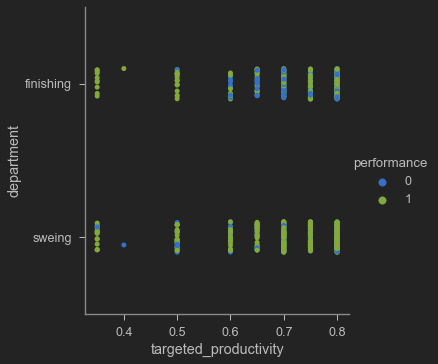

In [34]:
sns.catplot(data=df,
            y='department',
            x='targeted_productivity',
            hue='performance')

<AxesSubplot:xlabel='no_of_workers', ylabel='department'>

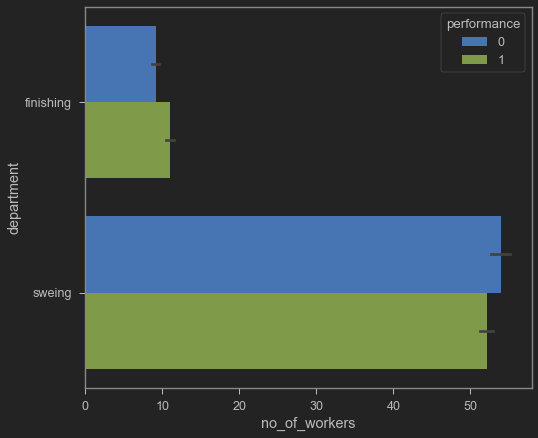

In [35]:
sns.barplot(data=df, y='department', x='no_of_workers', hue='performance')

<AxesSubplot:xlabel='day', ylabel='count'>

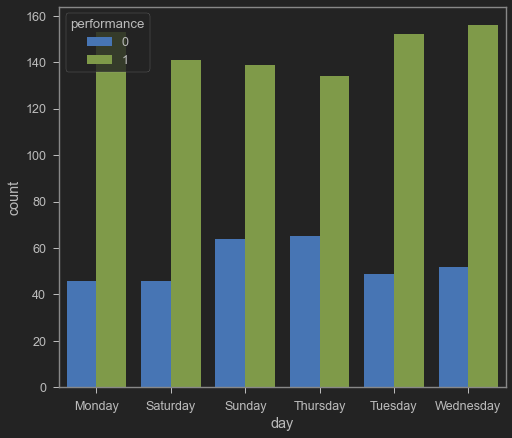

In [36]:
sns.countplot(data=df, hue='performance', x= 'day')

# MODEL

## dummy model

Class balance y_train: 
1    0.721293
0    0.278707
Name: performance, dtype: float64

Class balance y_test: 
1    0.76
0    0.24
Name: performance, dtype: float64

------------------------------


******************************************************************************************
Train accuracy score: 0.592
Test accuracy score: 0.6033
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    DummyClassifier(strategy='stratified')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.21      0.24      0.22        72
           1       0.75      0.71      0.73       228

    accuracy                           0.60       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.62      0.60      0.61       300

************************************************************


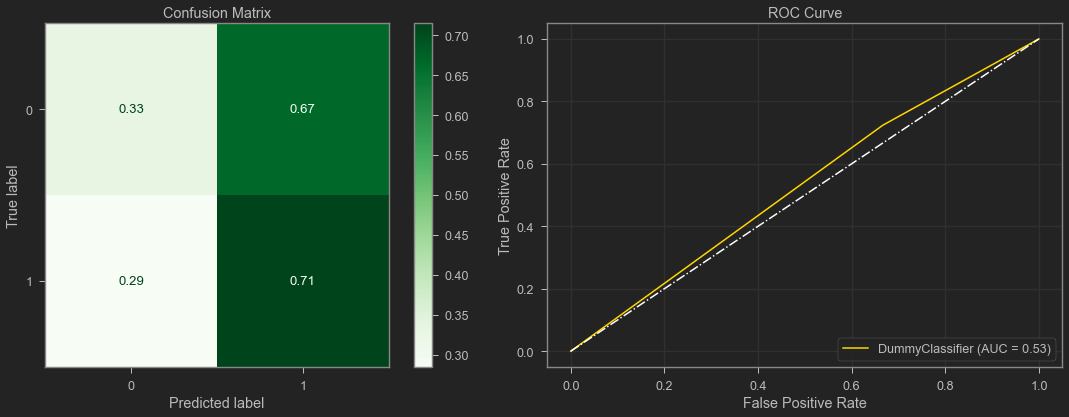

In [37]:
X_train_dummy, X_test_dummy = fun.dataset_preprocessing_pipeline(
    X_train, X_test)

dummy_classifier = DummyClassifier(strategy='stratified')
print(f"""Class balance y_train: 
{y_train.value_counts(1)}
""")
print(f"""Class balance y_test: 
{y_test.value_counts(1)}
""")
print(f"""{'-'*30}""")
fun.model_report(dummy_classifier,
                 X_train=X_train_dummy,
                 y_train=y_train,
                 X_test=X_test_dummy,
                 y_test=y_test)

## logistic regression

### corr

In [38]:
df.corr()['performance']

team                    -0.089525
targeted_productivity    0.003162
smv                      0.156531
wip                      0.151204
over_time                0.190724
incentive                0.069441
idle_time               -0.058113
idle_men                -0.148807
no_of_style_change       0.006260
no_of_workers            0.246983
performance              1.000000
Name: performance, dtype: float64

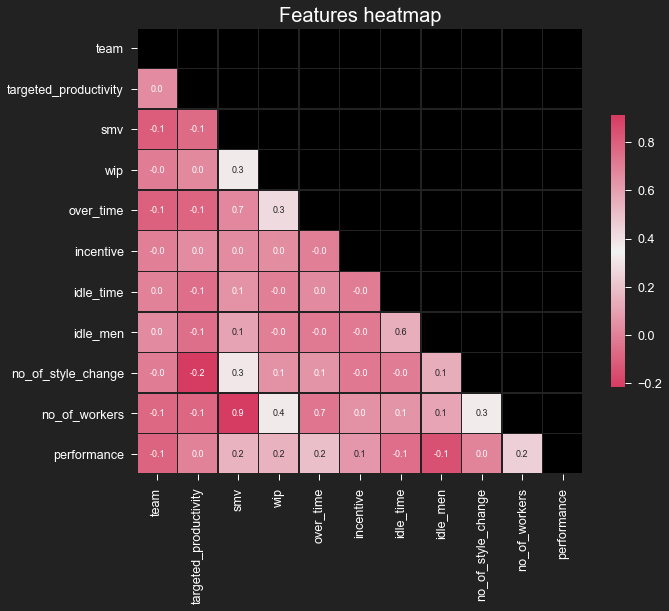

In [39]:
fun.heatmap_of_features(df);

In [40]:
display(fun.top_correlated_features(df))
print(f"""Features should be dropped: {
                                    fun.drop_features_based_on_correlation(
                                    df, threshold=0.75)
                                        }""")

,feature_combo,correlation
0,smv and no_of_workers,0.912176


Features should be dropped: {'no_of_workers'}


In [41]:
# X_train_dropped_ = X_train.drop('no_of_workers',axis=1)
# X_test_dropped_ = X_test.drop('no_of_workers',axis=1)

# X_train_log_reg, X_test_log_reg = fun.dataset_preprocessing_pipeline(
#     X_train_dropped_, X_test_dropped_, drop='first')

In [42]:
X_train_log_reg, X_test_log_reg = fun.dataset_preprocessing_pipeline(
    X_train, X_test, scaler=fun.PowerTransformer(), drop='first')

### logistic regression classifier

******************************************************************************************
Train accuracy score: 0.7101
Test accuracy score: 0.71
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    LogisticRegression(C=100000.0, class_weight='balanced', max_iter=1000)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.85      0.58        72
           1       0.93      0.67      0.78       228

    accuracy                           0.71       300
   macro avg       0.69      0.76      0.68       300
weighted avg       0.82      0.71      0.73       300

************************************************************


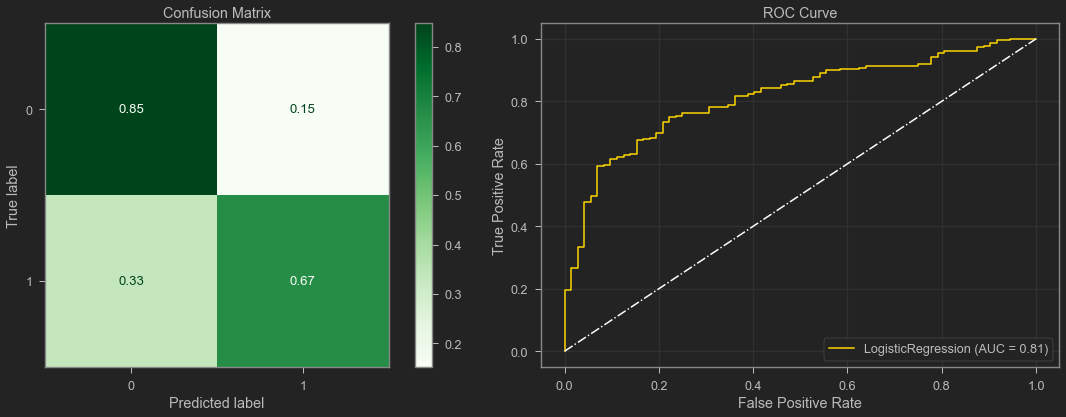

In [43]:
# logistic regression classifier
logreg = LogisticRegression(C=1e5, max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fun.model_report(logreg,
             X_train=X_train_log_reg,
             y_train=y_train,
             X_test=X_test_log_reg,
             y_test=y_test)

In [44]:
# fit logistic regression classifier to train data
logreg.fit(X_train_log_reg, y_train)
logreg.predict_proba(X_train_log_reg)

array([[0.10978709, 0.89021291],
       [0.51670401, 0.48329599],
       [0.14197902, 0.85802098],
       ...,
       [0.19900335, 0.80099665],
       [0.0690203 , 0.9309797 ],
       [0.23750767, 0.76249233]])

<AxesSubplot:>

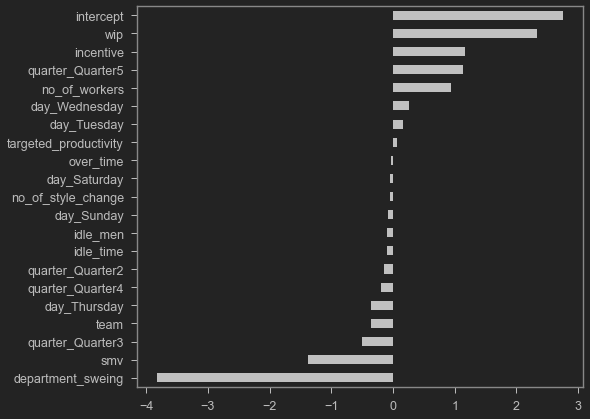

In [45]:
fun.coefficients_of_model_binary(
    logreg, X_train_log_reg, log_scale=True).sort_values().plot(kind='barh',
                                                                color='silver')

### grid search with Cross Validation

In [46]:
logreg_gs = LogisticRegression(max_iter=1e4,
                               class_weight='balanced',
                               n_jobs=-1)
params = {
    'C': [.0001, .001, .01, .1, 10, 100, 1000, 10000, 1e6, 1e12],
    'tol': [0.0001, 0.001, 0.01, .1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
gridsearch_logreg = GridSearchCV(estimator=logreg_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='accuracy')
gridsearch_logreg

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000.0, n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10000,
                               1000000.0, 1000000000000.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [47]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_logreg.fit(X_train_log_reg, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_logreg.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_logreg.best_estimator_}")

Best Parameters by gridsearch:	{'C': 100, 'penalty': 'l2', 'solver': 'sag', 'tol': 1}
Best Estimator by gridsearch:	LogisticRegression(C=100, class_weight='balanced', max_iter=10000.0, n_jobs=-1,
                   solver='sag', tol=1)


******************************************************************************************
Train accuracy score: 0.6767
Test accuracy score: 0.6733
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    LogisticRegression(C=100, class_weight='balanced', max_iter=10000.0, n_jobs=-1,
                   solver='sag', tol=1)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.42      0.89      0.57        72
           1       0.95      0.61      0.74       228

    accuracy                           0.67       300
   macro avg       0.68      0.75      0.65       300
weighted avg       0.82      0.67      0.70       300

************************************************************


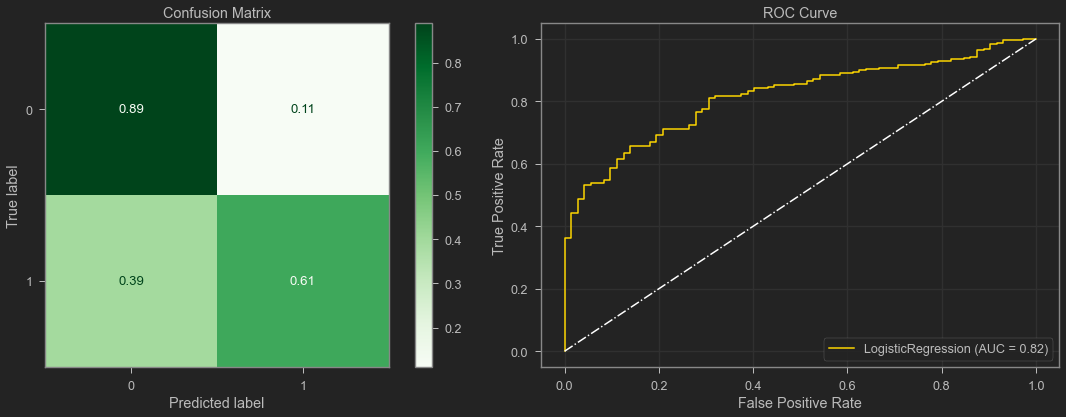

In [48]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    logreg_gs_best = gridsearch_logreg.best_estimator_
    fun.model_report(logreg_gs_best, X_train_log_reg, y_train, X_test_log_reg,
                 y_test)

## KNN

******************************************************************************************
Train accuracy score: 0.8172
Test accuracy score: 0.7733
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    KNeighborsClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.36      0.43        72
           1       0.82      0.90      0.86       228

    accuracy                           0.77       300
   macro avg       0.68      0.63      0.65       300
weighted avg       0.75      0.77      0.76       300

************************************************************


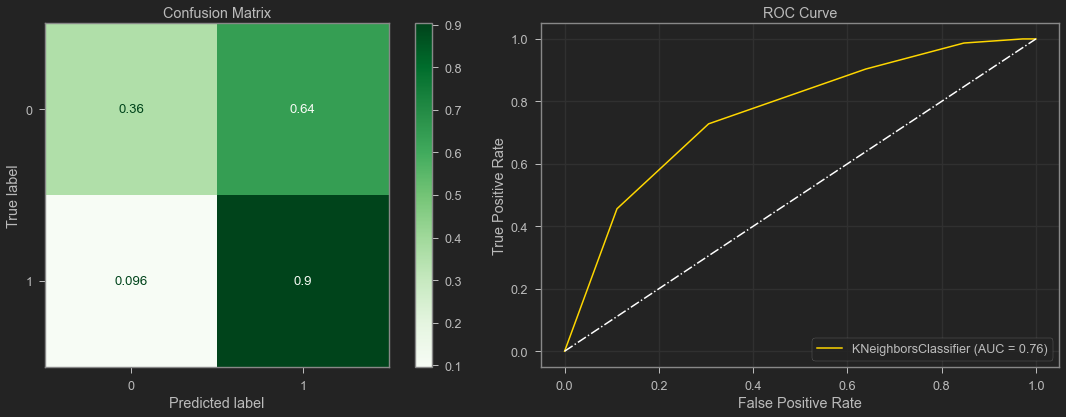

In [49]:
X_train_knn, X_test_knn = fun.dataset_preprocessing_pipeline(X_train, X_test)

knn = KNeighborsClassifier()
fun.model_report(knn, X_train_knn, y_train, X_test_knn, y_test)

### grid search with Cross Validation

In [50]:
knn_gs = KNeighborsClassifier(n_jobs=-1)
params = {
    'n_neighbors': list(range(1, 31, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2, 2.5, 3, 4],
    'leaf_size': [30, 40],
    #     'metric': ['minkowski', 'manhattan', 'euclidean']
}
gridsearch_knn = GridSearchCV(estimator=knn_gs,
                              param_grid=params,
                              n_jobs=-1,
                              scoring='precision')
gridsearch_knn

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'p': [1, 2, 2.5, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

Best Parameters by gridsearch:	{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Best Estimator by gridsearch:	KNeighborsClassifier(n_jobs=-1, n_neighbors=1)


******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.79
    Possible Overfitting, diffrence of scores 21.0% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    KNeighborsClassifier(n_jobs=-1, n_neighbors=1)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.54      0.55        72
           1       0.86      0.87      0.86       228

    accuracy                           0.79       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.79      0.79      0.79       300

************************************************************


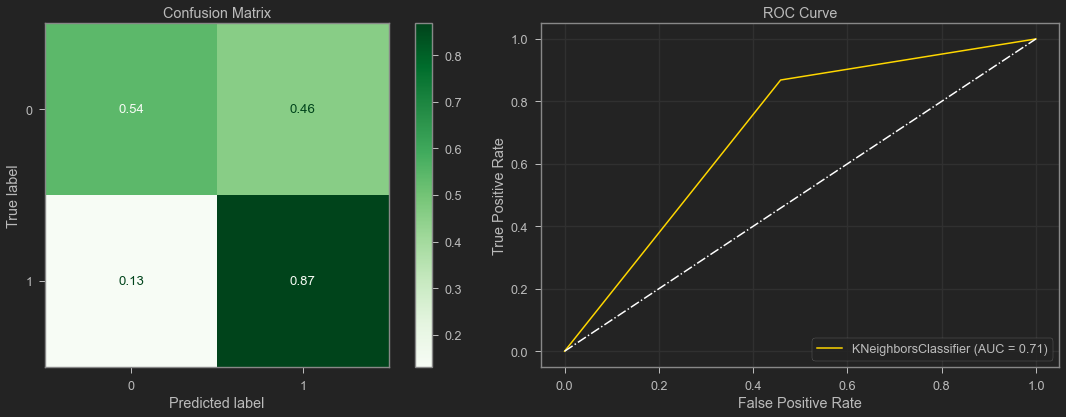

In [51]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_knn.fit(X_train_knn, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_knn.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_knn.best_estimator_}")

knn_gs_best = gridsearch_knn.best_estimator_
fun.model_report(knn_gs_best, X_train_knn, y_train, X_test_knn,
             y_test)

## ensemble methods

In [52]:
X_train_ensbl, X_test_ensbl = fun.dataset_preprocessing_pipeline(X_train, X_test)

### Random forest

In [53]:
rf_clf = RandomForestClassifier()

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.8433
    Possible Overfitting, diffrence of scores 15.67% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    RandomForestClassifier()
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        72
           1       0.88      0.93      0.90       228

    accuracy                           0.84       300
   macro avg       0.79      0.75      0.77       300
weighted avg       0.84      0.84      0.84       300

************************************************************


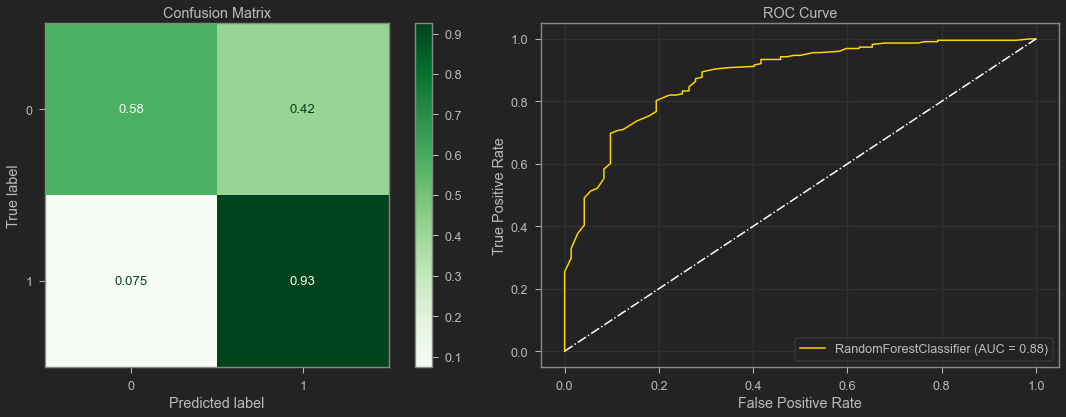

In [54]:
fun.model_report(rf_clf, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

#### grid search with Cross Validation

In [55]:
rf_clf_gs = RandomForestClassifier(n_jobs=-1)
params = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'class_weight':["balanced", "balanced_subsample"]
}
gridsearch_rf_clf = GridSearchCV(estimator=rf_clf_gs,
                              param_grid=params,
                              n_jobs=-1,
                              scoring='roc_auc')#'roc_auc_ovr_weighted'
gridsearch_rf_clf

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='roc_auc')

Best Parameters by gridsearch:	{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}
Best Estimator by gridsearch:	RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       n_jobs=-1)


******************************************************************************************
Train accuracy score: 0.728
Test accuracy score: 0.7033
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       n_jobs=-1)
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.83      0.57        72
           1       0.93      0.66      0.77       228

    accuracy                           0.70       300
   macro avg       0.68      0.75      0.67       300
weighted avg       0.81      0.70      0.72       300

************************************************************


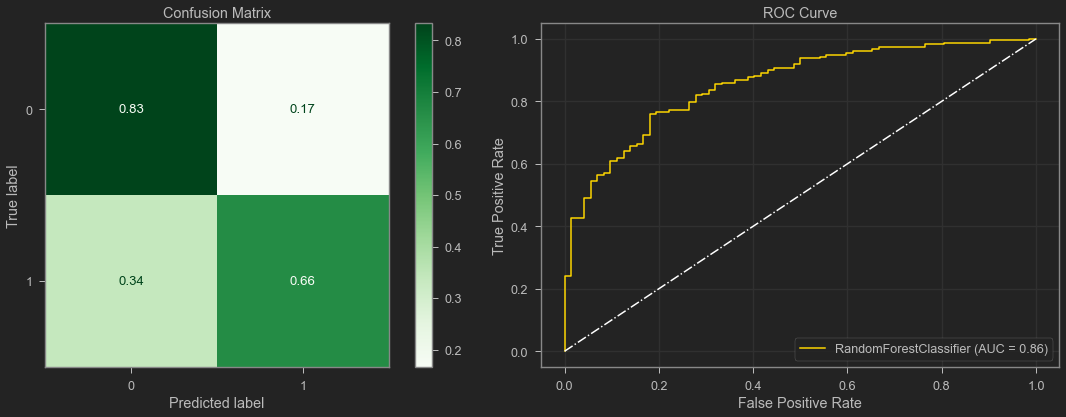

In [56]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_rf_clf.fit(X_train_ensbl, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_rf_clf.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_rf_clf.best_estimator_}")

rf_clf_gs_best = gridsearch_rf_clf.best_estimator_
fun.model_report(rf_clf_gs_best, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

### XGBClassifier

******************************************************************************************
Train accuracy score: 0.9978
Test accuracy score: 0.7933
    Possible Overfitting, diffrence of scores 20.44% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
---------

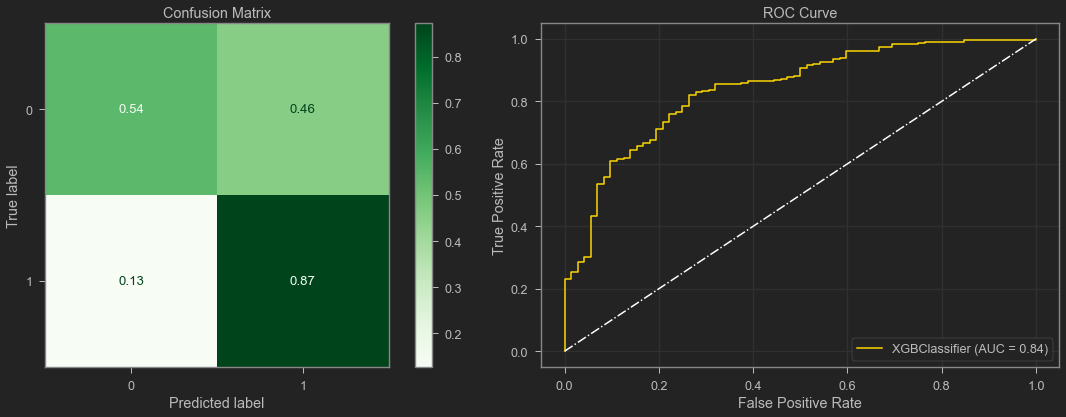

In [57]:
xgg_clf = XGBClassifier(n_jobs=-1)
fun.model_report(xgg_clf, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

#### grid search with Cross Validation

In [58]:
xgg_clf_gs = XGBClassifier(n_jobs=-1,verbosity=0,objective='binary:logistic',eval_metric='error')#“rank:pairwise”,“count:poisson” #'logloss','auc'
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ["balanced", "balanced_subsample"],
    'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
    'importance_type':["gain", "weight", "cover", "total_gain","total_cover"],
}
gridsearch_xgg_clf_gs = GridSearchCV(estimator=xgg_clf_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='roc_auc')  #'roc_auc_ovr_weighted'
gridsearch_xgg_clf_gs

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='error',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estima...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=0),
             n_jobs=-1,
             param_grid={'cc

******************************************************************************************
Train accuracy score: 0.9197
Test accuracy score: 0.8267
    Possible Overfitting, diffrence of scores 9.31% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBClassifier(base_score=0.5, booster='gbtree', ccp_alpha=0.0,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, criterion='gini', eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1,
              min_samples_leaf=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_

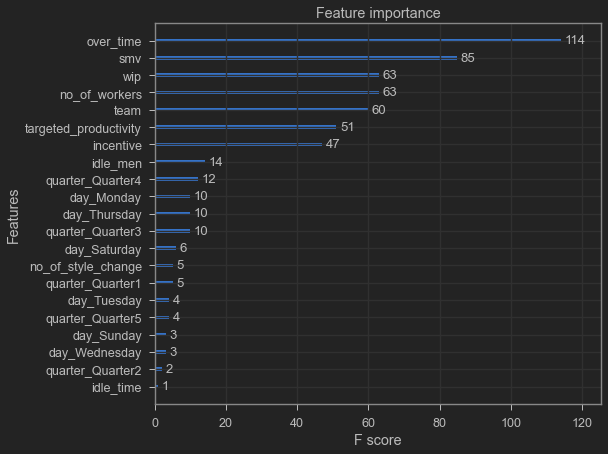

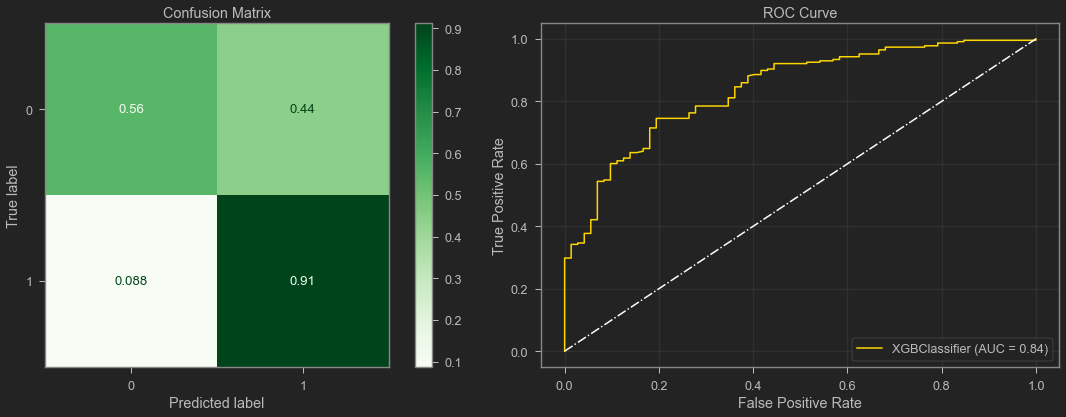

In [59]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_xgg_clf_gs.fit(X_train_ensbl, y_train)
#     print(f"Best Parameters by gridsearch:\t{gridsearch_xgg_clf_gs.best_params_}")
#     print(f"Best Estimator by gridsearch:\t{gridsearch_xgg_clf_gs.best_estimator_}")
    
    
    xgg_clf_gs_best = gridsearch_xgg_clf_gs.best_estimator_
    xgb.plot_importance(xgg_clf_gs_best)
    fun.model_report(xgg_clf_gs_best, X_train_ensbl, y_train, X_test_ensbl,
                 y_test)

### XGBRFClassifier

******************************************************************************************
Train accuracy score: 0.8685
Test accuracy score: 0.81
    Possible Overfitting, diffrence of scores 5.85% crossed 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=0, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)
----------------------------------------

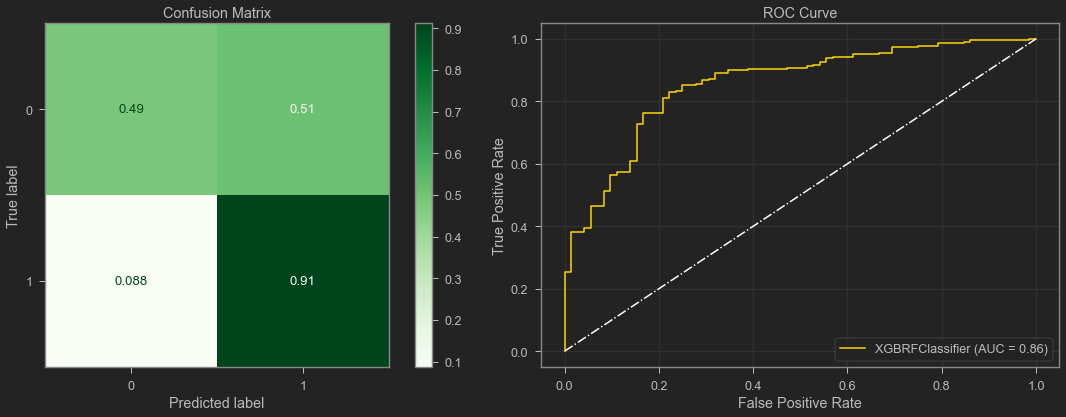

In [60]:
xgg_rf_clf = XGBRFClassifier()
fun.model_report(xgg_rf_clf, X_train_ensbl, y_train, X_test_ensbl,
             y_test)

#### grid search with Cross Validation

In [61]:
xgg_rf_clf_gs = XGBRFClassifier(
    n_jobs=-1,
    verbosity=0,
    objective='binary:logistic',
)  #“rank:pairwise”,“count:poisson” #'logloss','auc','error'
# params = {
#     'criterion': ["gini", "entropy"],
#     'max_depth': [2, 3, 4],
#     'min_samples_leaf': [1, 2, 3, 4],
#     'class_weight': ["balanced", "balanced_subsample"],
#     'ccp_alpha': [0.0, 0.01]
# }
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ["balanced", "balanced_subsample"],
    'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
    'importance_type':
    ["gain", "weight", "cover", "total_gain", "total_cover"],
    'eval_metric': ['logloss', 'auc', 'error']
}
gridsearch_xgg_rf_clf = GridSearchCV(
    estimator=xgg_rf_clf_gs,
    param_grid=params,
    n_jobs=-1,
    scoring='neg_brier_score')  #'roc_auc_ovr_weighted'
gridsearch_xgg_rf_clf

GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None, gamma=None,
                                       gpu_id=None, importance_type='gain',
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=-1,
                                       num_parallel_tree=None,
                                       objective='binary...
                                       validate_parameters=None, verbosity=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
                         'class_weight': ['balanced', 'balanced_subsamp

******************************************************************************************
Train accuracy score: 0.8417
Test accuracy score: 0.81
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

************************************************************
Classification report of:
    XGBRFClassifier(base_score=0.5, booster='gbtree', ccp_alpha=0.0,
                class_weight='balanced', colsample_bylevel=1,
                colsample_bytree=1, criterion='gini', eval_metric='logloss',
                gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=4,
                min_child_weight=1, min_samples_leaf=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=-1,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=0, reg

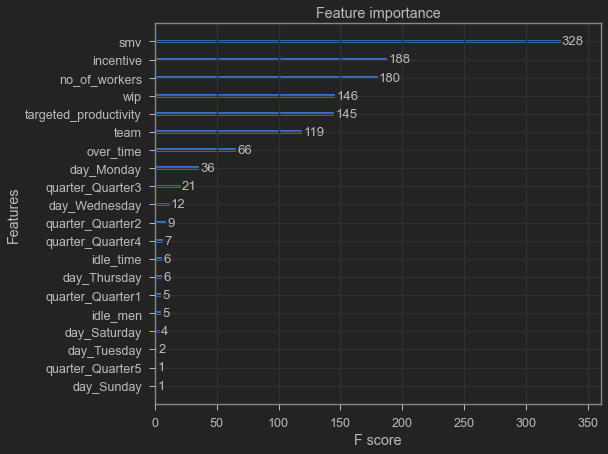

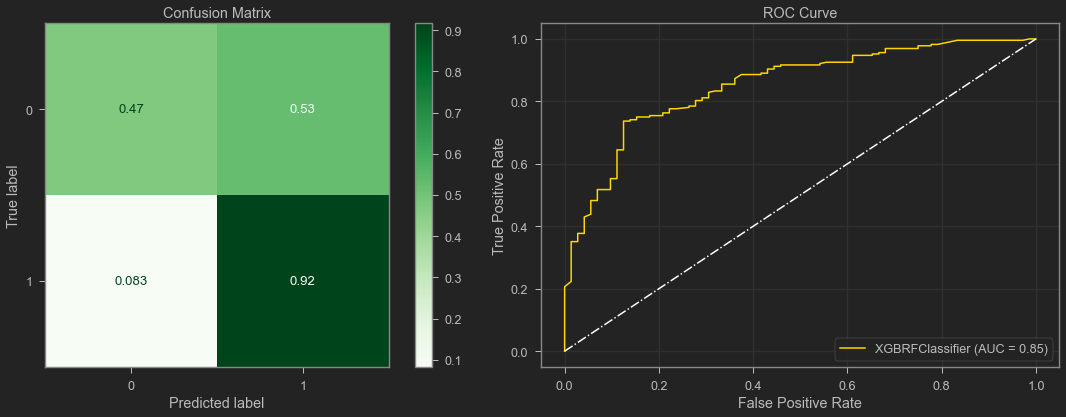

In [62]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_xgg_rf_clf.fit(X_train_ensbl, y_train)
#     print(f"Best Parameters by gridsearch:\t{gridsearch_xgg_rf_clf.best_params_}")
#     print(f"Best Estimator by gridsearch:\t{gridsearch_xgg_rf_clf.best_estimator_}")

    xgg_rf_clf_gs_best = gridsearch_xgg_rf_clf.best_estimator_
    xgb.plot_importance(xgg_rf_clf_gs_best)
    fun.model_report(xgg_rf_clf_gs_best, X_train_ensbl, y_train, X_test_ensbl,
                 y_test)

### catboost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

------------------------------------------------------------------------------------------
Train score: 0.68
Test score: 0.6667

              precision    recall  f1-score   support

           0       0.41      0.86      0.55        72
           1       0.93      0.61      0.73       228

    accuracy                           0.67       300
   macro avg       0.67      0.73      0.64       300
weighted avg       0.81      0.67      0.69       300



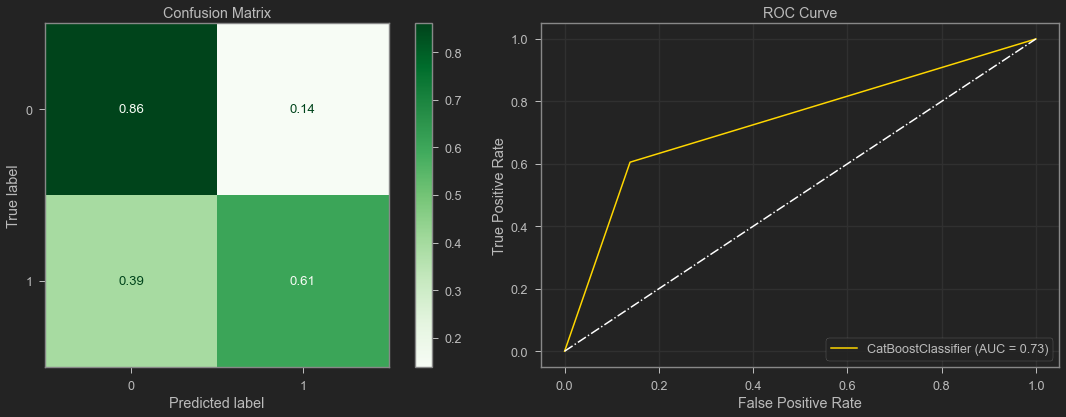

In [63]:
model = CatBoostClassifier(task_type='GPU',
                           auto_class_weights='SqrtBalanced',
                           eval_metric='Precision',
                           devices=[0, 1],
                           min_data_in_leaf=3,
                           iterations=500)

# 'Logloss', 'CrossEntropy', 'CtrFactor', 'RMSE', 'Lq', 'MAE', 'Quantile',
# 'Expectile', 'LogLinQuantile', 'MAPE', 'Poisson', 'MSLE',
# 'MedianAbsoluteError', 'SMAPE', 'Huber', 'Tweedie', 'RMSEWithUncertainty',
# 'MultiClass', 'MultiClassOneVsAll', 'PairLogit', 'PairLogitPairwise',
# 'YetiRank', 'YetiRankPairwise', 'QueryRMSE', 'QuerySoftMax',
# 'QueryCrossEntropy', 'StochasticFilter', 'StochasticRank',
# 'PythonUserDefinedPerObject', 'PythonUserDefinedMultiRegression',
# 'UserPerObjMetric', 'UserQuerywiseMetric', 'R2', 'NumErrors', 'FairLoss',
# 'AUC', 'Accuracy', 'BalancedAccuracy', 'BalancedErrorRate', 'BrierScore',
# 'Precision', 'Recall', 'F1', 'TotalF1', 'MCC', 'ZeroOneLoss',
# 'HammingLoss', 'HingeLoss', 'Kappa', 'WKappa', 'LogLikelihoodOfPrediction',
# 'NormalizedGini', 'PRAUC', 'PairAccuracy', 'AverageGain', 'QueryAverage',
# 'QueryAUC', 'PFound', 'PrecisionAt', 'RecallAt', 'MAP', 'NDCG', 'DCG',
# 'FilteredDCG', 'MultiRMSE', 'Combination'

cat_features = list(X_train.select_dtypes('category').columns)

model.fit(X_train,
          y_train,
          cat_features=cat_features,
          eval_set=(X_test, y_test),
          plot=True,
          silent=True,
          use_best_model=True)
print(f'{"-"*90}')
train = model.score(X_train, y_train)
test = model.score(X_test, y_test)
print(f"""Train score: {train.round(4)}""")
print(f"""Test score: {test.round(4)}""")
print(f"")
print(metrics.classification_report(y_test, model.predict(X_test)))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
metrics.plot_confusion_matrix(model,
                              X_test,
                              y_test,
                              cmap='Greens',
                              normalize='true',
                              ax=ax[0])
ax[0].title.set_text('Confusion Matrix')
metrics.plot_roc_curve(model, X_test, y_test, color='gold', ax=ax[1])
ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
ax[1].grid()
ax[1].title.set_text('ROC Curve')

plt.tight_layout()
plt.show()

#### grid search with Cross Validation

In [64]:
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score,precision_recall_curve, f1_score

In [65]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    clf = CatBoostClassifier(task_type='GPU', iterations=2)
    params = {
        'eval_metric': ['Precision', 'Accuracy', 'Recall', 'AUC', 'F1'],
        'depth': [4, 5, 6],
        'loss_function': ['Logloss', 'CrossEntropy'],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'auto_class_weights': ['SqrtBalanced', 'Balanced', None],
        'leaf_estimation_method': ['Newton', 'Gradient'],
        'logging_level': ['Silent']
    }
    scorer = make_scorer(f1_score)
    clf_grid = GridSearchCV(estimator=clf,
                            param_grid=params,
                            scoring=scorer,
                            cv=5)
    clf_grid.fit(X_train_svm, y_train)
    print(clf_grid.best_params_)
    clf_grid_best = clf_grid.best_estimator_
    fun.model_report(clf_grid_best, X_train_svm, y_train, X_test_svm,
                     y_test)

NameError: name 'X_train_svm' is not defined

## Support Vector Machines

In [ ]:
X_train_svm, X_test_svm  = fun.dataset_preprocessing_pipeline(X_train, X_test)

### lin

In [ ]:
svc_linear = SVC(kernel='linear', C=100,class_weight='balanced')
fun.model_report(svc_linear, X_train_svm, y_train, X_test_svm,
             y_test)

### rbf

In [ ]:
svc_rbf = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', tol=.8)
fun.model_report(svc_rbf, X_train_svm, y_train, X_test_svm,
             y_test)

### poly 

In [ ]:
svc_poly = SVC(kernel='poly',
               degree=8,
               C=1,
               gamma='scale',
               class_weight='balanced')
fun.model_report(svc_poly, X_train_svm, y_train, X_test_svm,
             y_test)

### sigmoid

In [ ]:
svc_sig = SVC(kernel='sigmoid', C=2, class_weight='balanced')
fun.model_report(svc_sig, X_train_svm, y_train, X_test_svm,
             y_test)

### grid search with Cross Validation

In [ ]:
svc_linear_gs = SVC(class_weight="balanced")
params = {
    'C': [1, 10, 1e2, 1e3],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'tol': [0.001, .5, 1, 5],
}
gridsearch_svc_linear = GridSearchCV(
    estimator=svc_linear_gs,
    param_grid=params,
    n_jobs=-1,
    scoring='roc_auc')  #'roc_auc_ovr_weighted'
gridsearch_svc_linear

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_svc_linear.fit(X_train_svm, y_train)
print(f"Best Parameters by gridsearch:\t{gridsearch_svc_linear.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_svc_linear.best_estimator_}")

svc_linear_gs_best = gridsearch_svc_linear.best_estimator_
fun.model_report(svc_linear_gs_best, X_train_svm, y_train, X_test_svm,
             y_test)

## Best model

# INTERPRET

# RECOMMENDATION

# NEXT STEPS

# APPENDIX

## all functions from the `functions.py` and `packages.py`

In [ ]:
fun.show_py_file_content('functions.py')

In [ ]:
fun.show_py_file_content('packages.py')